## Car price prediction🚗

In this notebook we'll use python for training a model that can predict the price of a car.

### 1. Problem
To predict the price of car based on various attributes

### 2. Data 

I took the dataset from kaggle https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

### 3. Features

The columns in the given dataset are as follows:

* name
* year
* selling_price
* km_driven
* fuel
* seller_type
* transmission

## Let's start

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('datasets_33080_1320127_car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.Transmission.value_counts(), df.Owner.value_counts(), df.Seller_Type.value_counts()

(Manual       261
 Automatic     40
 Name: Transmission, dtype: int64,
 0    290
 1     10
 3      1
 Name: Owner, dtype: int64,
 Dealer        195
 Individual    106
 Name: Seller_Type, dtype: int64)

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
df = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [11]:
df['Current_year'] = 2020
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020


In [12]:
df['Year_old_car'] = df['Current_year'] - df['Year']
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Year_old_car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020,4
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020,5
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020,11
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020,3


In [13]:
df.drop(['Current_year', 'Year'], axis=1, inplace=True)
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_old_car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


In [14]:
df=pd.get_dummies(df,drop_first=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Selling_Price           301 non-null    float64
 1   Present_Price           301 non-null    float64
 2   Kms_Driven              301 non-null    int64  
 3   Owner                   301 non-null    int64  
 4   Year_old_car            301 non-null    int64  
 5   Fuel_Type_Diesel        301 non-null    uint8  
 6   Fuel_Type_Petrol        301 non-null    uint8  
 7   Seller_Type_Individual  301 non-null    uint8  
 8   Transmission_Manual     301 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 13.1 KB


In [16]:
# Let's view corelation between features
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Year_old_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Year_old_car,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [29]:
pip install seaborn

  Using cached seaborn-0.10.1-py3-none-any.whl (215 kB)
Note: you may need to restart the kernel to use updated packages.


In [30]:
import seaborn as sns

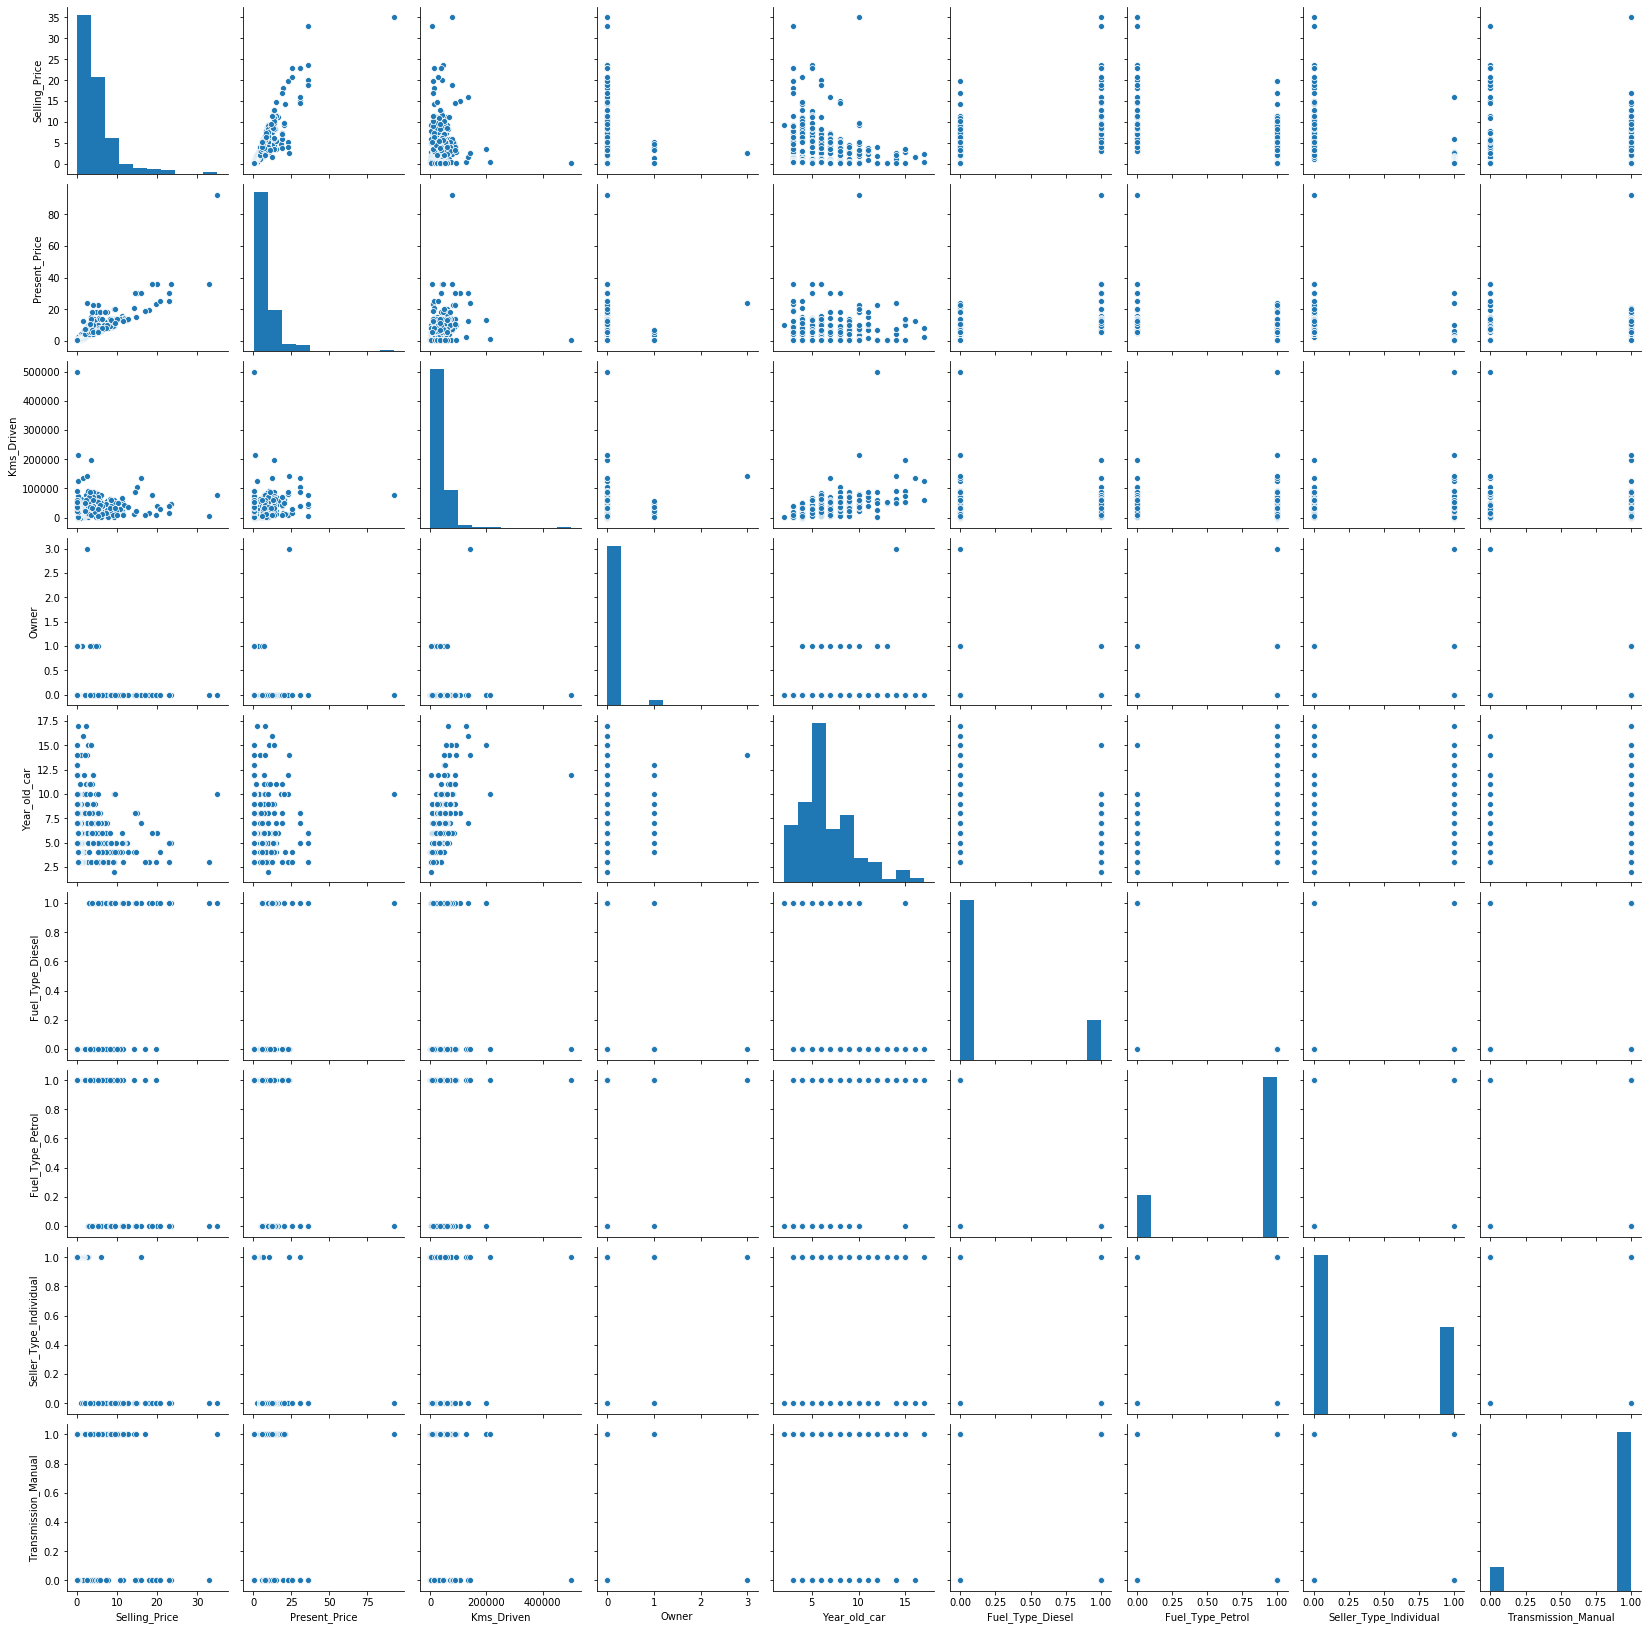

In [31]:
sns.pairplot(df)

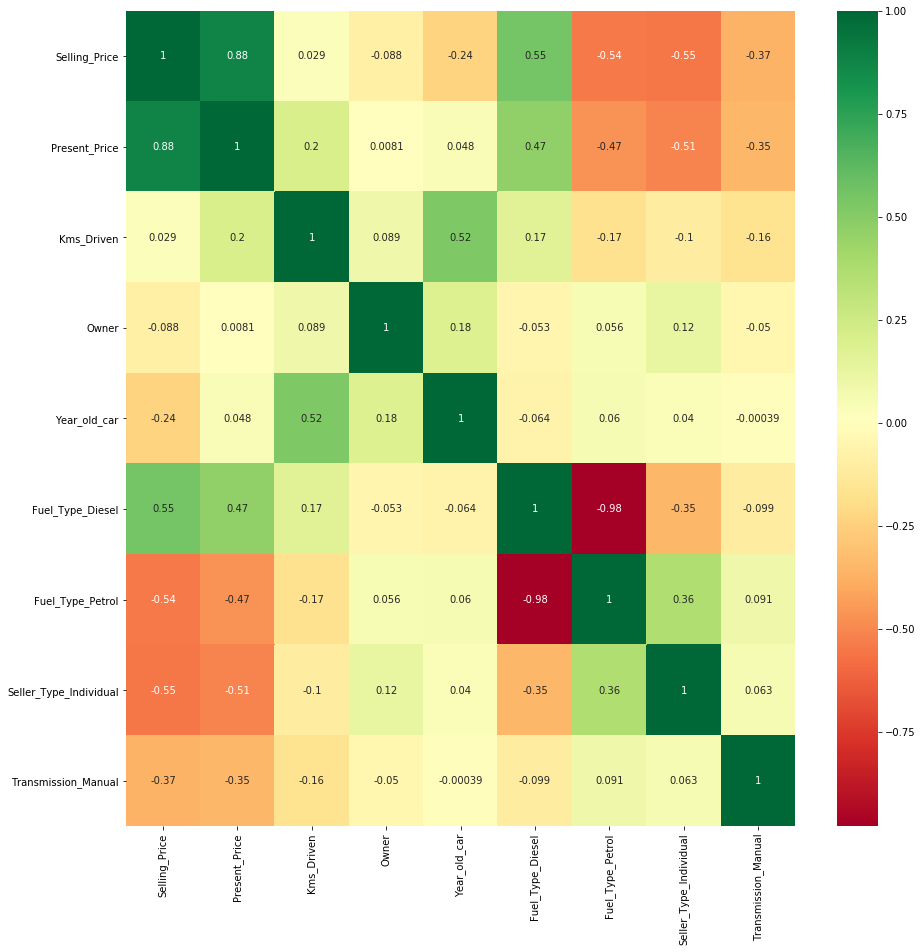

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

corr_metrics = df.corr()
top_correlated_features = corr_metrics.index
plt.figure(figsize=(15,15))
g= sns.heatmap(df[top_correlated_features].corr(), annot= True, cmap='RdYlGn')

In [33]:
## Let's split data into independent and dependent features
x = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

## Modelling

In [34]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [35]:
xtrain.shape, xtest.shape

((240, 8), (61, 8))

In [36]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()

In [37]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# different randomforestregressor hyperperameters
rf_grid = {'n_estimators' : np.arange(10, 100, 10),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split' : np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2),
            'max_features' : [0.5, 1, 'sqrt', 'auto']}

# instentiate randomizedsearchcv model
rs_model= RandomizedSearchCV(RandomForestRegressor(n_jobs = 1, 
                                                  random_state=42),
                                                  param_distributions = rf_grid,
                                                  n_iter = 10,
                                                  cv=5,
                                                  verbose=2,
                                                  scoring='neg_mean_squared_error')

rs_model.fit(xtrain, ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=80, min_samples_split=6, min_samples_leaf=9, max_features=auto, max_depth=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=80, min_samples_split=6, min_samples_leaf=9, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=80, min_samples_split=6, min_samples_leaf=9, max_features=auto, max_depth=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=80, min_samples_split=6, min_samples_leaf=9, max_features=auto, max_depth=3, total=   0.3s
[CV] n_estimators=80, min_samples_split=6, min_samples_leaf=9, max_features=auto, max_depth=3 
[CV]  n_estimators=80, min_samples_split=6, min_samples_leaf=9, max_features=auto, max_depth=3, total=   0.3s
[CV] n_estimators=80, min_samples_split=6, min_samples_leaf=9, max_features=auto, max_depth=3 
[CV]  n_estimators=80, min_samples_split=6, min_samples_leaf=9, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=80, min_samples_split=6, min_samples_leaf=9, max_features=auto, max_depth=3 
[CV]  n_estimators=80, min_samples_split=6, min_samples_leaf=9, max_features=auto, max_depth=3, total=   0.2s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=9, max_features=0.5, max_depth=5 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=9, max_features=0.5, max_depth=5, total=   0.1s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=9, max_featu

[CV]  n_estimators=50, min_samples_split=8, min_samples_leaf=13, max_features=1, max_depth=3, total=   0.1s
[CV] n_estimators=50, min_samples_split=8, min_samples_leaf=13, max_features=1, max_depth=3 
[CV]  n_estimators=50, min_samples_split=8, min_samples_leaf=13, max_features=1, max_depth=3, total=   0.1s
[CV] n_estimators=50, min_samples_split=8, min_samples_leaf=13, max_features=1, max_depth=3 
[CV]  n_estimators=50, min_samples_split=8, min_samples_leaf=13, max_features=1, max_depth=3, total=   0.2s
[CV] n_estimators=50, min_samples_split=8, min_samples_leaf=13, max_features=1, max_depth=3 
[CV]  n_estimators=50, min_samples_split=8, min_samples_leaf=13, max_features=1, max_depth=3, total=   0.2s
[CV] n_estimators=90, min_samples_split=14, min_samples_leaf=17, max_features=sqrt, max_depth=10 
[CV]  n_estimators=90, min_samples_split=14, min_samples_leaf=17, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=90, min_samples_split=14, min_samples_leaf=17, max_features=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=1,
                    

In [38]:
preds = rs_model.predict(xtest)
preds

array([ 0.46423009,  1.32946595,  6.53581561,  6.86428975,  0.63921177,
        0.38534282,  3.28377099,  4.57834921,  4.70660677,  3.82864709,
        5.52657126,  6.23749235, 17.14739493,  0.57743115,  1.30464075,
        0.53583785,  0.59036904,  0.60055582,  0.52537118,  1.36277207,
        0.49109388,  0.76290963,  3.10456302,  5.72758304,  1.11850934,
        8.61509278,  0.50723681,  0.68830435,  0.5288603 , 11.18594411,
        1.14481061,  3.26095849,  6.64218146,  1.2600173 ,  5.35368574,
        0.47072898, 11.63444645,  6.93479602,  2.8776315 ,  5.38592602,
        8.44598976,  0.63992398,  6.30841457,  8.92366301,  6.64218146,
        0.71195359,  5.24694782,  7.28943378,  4.24549954,  4.86829998,
        0.44758119,  3.54286077,  0.44758119,  0.68830435,  0.83416405,
        6.96543461,  9.814616  ,  5.96451105,  3.26095849, 17.46867994,
        0.63364247])

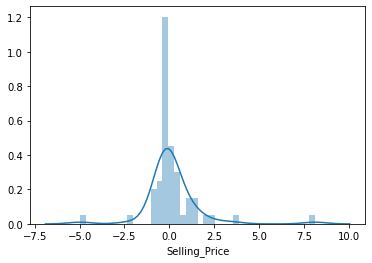

In [39]:
sns.distplot(ytest-preds)

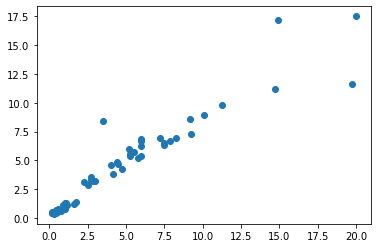

In [40]:
plt.scatter(ytest, preds)

In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, preds)

2.202480642546826

## Saving the model

In [51]:
import pickle
file= open('car-price-model.pkl', 'wb')

pickle.dump(rs_model, file)